In [7]:
# Code for cleaning up the csv files

# Name of the csv file to clean up
csv_file = 'raw_logs/production_log_0_raw.csv'
# Number of sessions to keep
sessions = 90

import pandas as pd

# Read the data from the CSV file
data = pd.read_csv(csv_file)

# Drop the rows where the column "sessions" is greater than the number of sessions to keep
data = data[data['sessions'] <= sessions]

# Drop the rows where the column "status" is "records_sent"
data = data[data['status'] != 'records_sent']

# Save the data to a new CSV file
data.to_csv('production_log_0.csv', index=False)

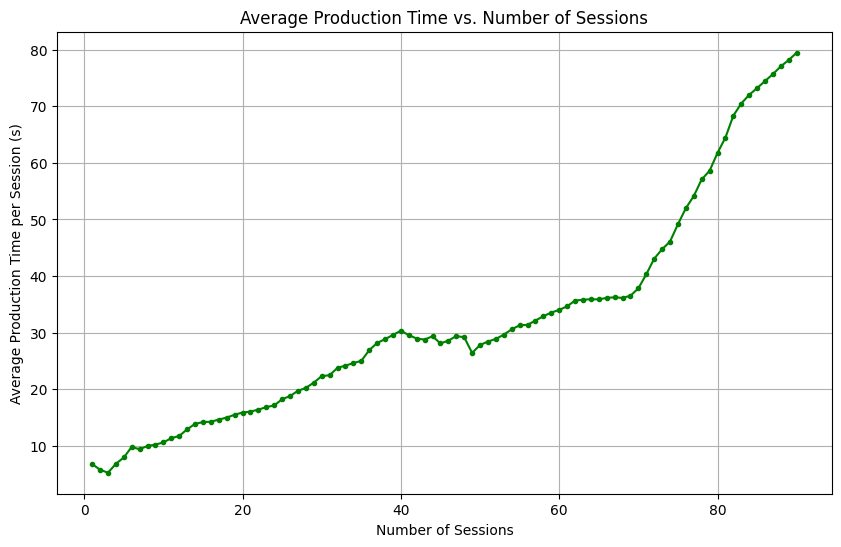

In [11]:
# Code for plotting the average production time vs. number of sessions

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'production_log_0.csv'
data = pd.read_csv(file_path)

# Ensure the timestamps are treated as floats
data['timestamp'] = data['timestamp'].astype(float)

# Get the maximum number of sessions
max_sessions = data['sessions'].max()

# Initialize a list to store the average production times
average_production_times = []

# Iterate through the number of sessions
for num_sessions in range(1, max_sessions + 1):
    # Get the "labels_received" timestamp for the current session
    labels_received_time = data[(data['sessions'] == num_sessions) & (data['status'] == 'labels_received')]['timestamp']

    # Get the "start" timestamp for the current session
    start_time_current_session = data[(data['sessions'] == num_sessions) & (data['status'] == 'start')]['timestamp']

    # If both timestamps exist, calculate the production time
    if not labels_received_time.empty and not start_time_current_session.empty:
        production_time = labels_received_time.iloc[0] - start_time_current_session.iloc[0]
        average_production_time = production_time / num_sessions
        average_production_times.append(average_production_time)
    else:
        average_production_times.append(None)  # Handle cases where no data is available

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_sessions + 1), average_production_times, marker='.', linestyle='-', color='g')
plt.title('Average Production Time vs. Number of Sessions')
plt.xlabel('Number of Sessions')
plt.ylabel('Average Production Time per Session (s)')
plt.grid(True)
plt.show()
